<a href="https://colab.research.google.com/github/Chaitya0623/Healo/blob/main/Healo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import json
# to load the json file and create it into a dataframe
with open('intents.json') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [4]:
# To split all the patterns
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' and 'stopwords' resources from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Create a lemmatizer object and define the list of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to lemmatize and remove stopwords from a sentence
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Lemmatize each word that is not a stopword and join them back into a sentence
    processed_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words])
    return processed_sentence

df['pattern'] = ''
for i in range(0,len(df)):
  df['pattern'][i] = process_sentence(df['patterns'][i])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tag,patterns,responses,pattern
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...,Hi
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...,Hey
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...,anyone ?
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...,Hi
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...,Hello
...,...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha...",know 'm unwell ?
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d...",maintain social connection ? feel lonely ?
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...,'s difference anxiety stress ?
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",'s difference sadness depression ?


In [6]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

number of unique words =  303
X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 18, 100)             │          30,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,824 (374.31 KB)

 Trainable params: 95,824 (374.31 KB)

 Non-trainable params: 0 (0.00 B)

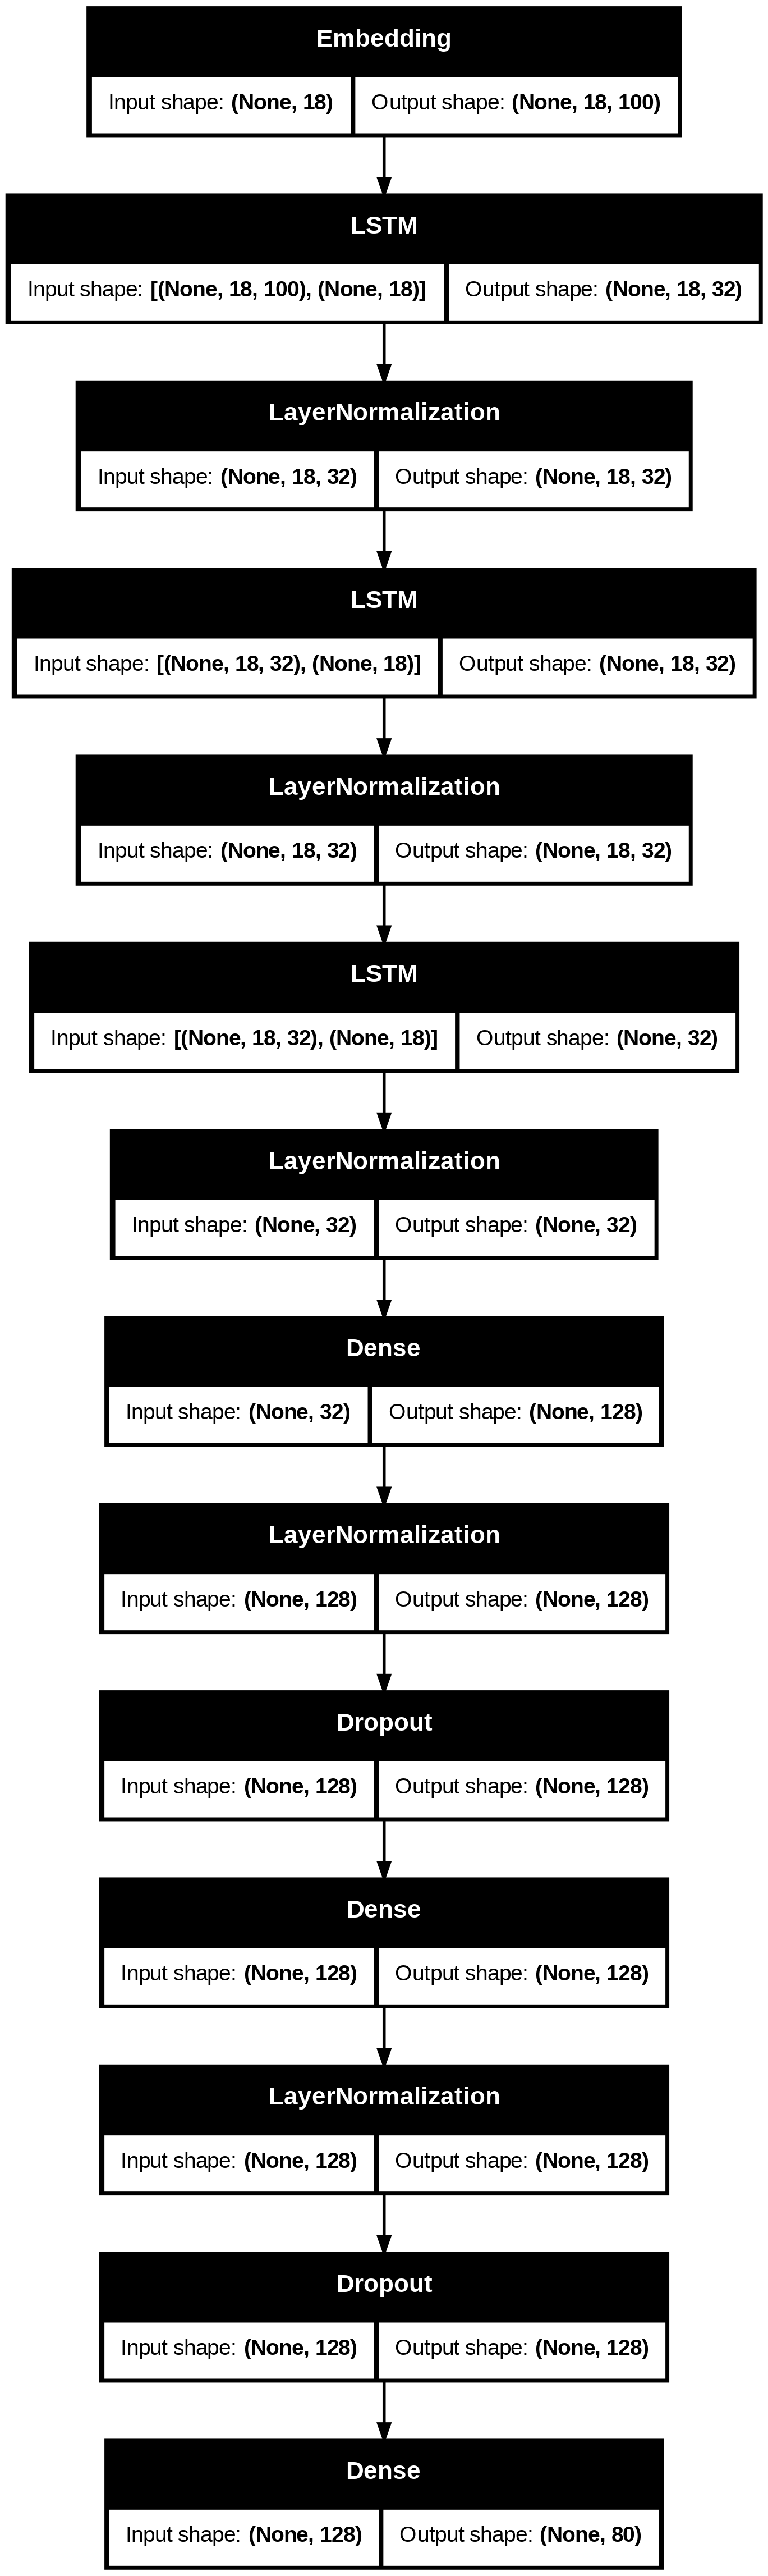

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True)) # converts indexes to dense vectors of fixed size
model.add(LSTM(32, return_sequences=True)) # long short term memory
model.add(LayerNormalization()) # normalize activations of previos layers independently, BatchNormalization()
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu")) # regular densely connected NN, relu = rectified linear unit activation, max(0, input tensor)
model.add(LayerNormalization())
model.add(Dropout(0.2)) # set input unit to 0, rate = 0.2
model.add(Dense(128, activation="relu")) # leakyRelu (allows small gradient), = alpha*x(x<0), x(x>0)
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax")) # softmax converts vector of values to probability distribution, sum=1, 0<x<1
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy']) # adam = gradient descent method
# loss = crossentropy loss between the labels and predictions
model.summary()
plot_model(model, show_shapes=True)

In [27]:
import re
import random

def model_response(query):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', query)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("Chatbot: {}".format(random.choice(responses)))

In [28]:
model_response('I am feeling low today')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Chatbot: Challenges or problems with your mental health can arise from psychological, biological, and social, issues, as well as life events.


In [29]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function for predicting sentiment of text
def predict_sentiment(text):
    # Tokenize text and convert to input ids and attention mask
    inputs = tokenizer1(text, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Predict sentiment using BERT model
    with torch.no_grad():
        logits = model1(input_ids, attention_mask=attention_mask)[0]
    probs = torch.softmax(logits, dim=1).tolist()[0]

    # Determine sentiment label based on highest probability
    sentiment = 'Positive' if probs[1] > probs[0] else 'Negative'

    return sentiment

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
# Define the main loop
print('Chatbot: Welcome to PeacePal. What problem are you facing?')
count = 0

while True:
    # Get user input
    message = input("You: ")
    sentiment = predict_sentiment(message)
    print('Sentiment: '+sentiment)
    if sentiment=='negative':
      count+=1
    if message=='quit':
      if count>5:
        print('High Risk: You will be contacted to the nearest distress helpline soon')
      elif count>3:
        print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
      else:
        print('Low Risk: Team PeacePal wishes you good health, stay healthy')
      break

    # Generate a response
    try:
      model_response(message)
    except:
      print('An Exception Occured')

Chatbot: Welcome to PeacePal. What problem are you facing?
You: No i don't want to feel this way
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Chatbot: If your beliefs , thoughts , feelings or behaviours have a significant impact on your ability to function in what might be considered a normal or ordinary way, it would be important to seek help.
You: I am so burned out
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Chatbot: Forgive me if i did anything to offend you. I only want to help
You: Bye
Sentiment: Positive
An Exception Occured
You: Bye then
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Chatbot: I am really sorry to hear that. I am here to help you with grief, anxiety and anything else you may feel at this time.


KeyboardInterrupt: Interrupted by user

In [ ]:
# LLM's (Large Language Models) can also be used by processing large amounts of data using statistical techniques to learn patterns and relationships between words,
# phrases, and sentences. They are based on neural networks and are trained using supervised learning. A large amount of data is required to train the model.
#  Once the model is trained, it can be used to predict the likelihood of the next word based on the preceding words. There are several chatbot building platforms
# that incorporate LLM technology, such as Dialogflow, Botpress, and Rasa (just import the api's). LangChain is a framework built around LLM's.